<a href="https://colab.research.google.com/github/Stan081/AML_CourseWork/blob/main/case_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/AML_Project/Datasets/Dataset_2.zip')
zip_ref.extractall('content/')
zip_ref.close()

In [ ]:
import numpy as np
import cv2 as cv
import shutil
import math
import os

In [ ]:
import os
import sys
import random
import warnings
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from tensorflow import keras
from keras.models import Model, load_model
from keras.layers import Input, Dropout, Lambda, Conv2D, MaxPooling2D, Dense, Layer, UpSampling2D, RandomFlip, RandomRotation,BatchNormalization,Activation
from keras.layers import Concatenate, Dot, Conv2DTranspose, MaxPool2D, multiply
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras import backend as K
import tensorflow as tf
import cv2
import glob
import matplotlib.image as img
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt

In [ ]:
# color input images
IMG_CHANNELS = 3

# image dimension
IMG_WIDTH = 384
IMG_HEIGHT = 384


TRAIN_PATH = sorted(glob.glob('content/Dataset_2/train/images/*'))
GT_PATH = sorted(glob.glob('content/Dataset_2/train/gt/*'))
TEST_PATH = glob.glob('content/Dataset_2/test/images/*')
TEST_GT_PATH = sorted(glob.glob('content/Dataset_2/test/gt/*'))

In [ ]:
TRAIN_PATH

['content/Dataset_2/train/images/DOP25_LV03_1301_11_2015_1_15_497500.0_119187.5.png',
 'content/Dataset_2/train/images/DOP25_LV03_1301_11_2015_1_15_497500.0_119812.5.png',
 'content/Dataset_2/train/images/DOP25_LV03_1301_11_2015_1_15_497500.0_119875.0.png',
 'content/Dataset_2/train/images/DOP25_LV03_1301_11_2015_1_15_497500.0_120125.0.png',
 'content/Dataset_2/train/images/DOP25_LV03_1301_11_2015_1_15_497500.0_120187.5.png',
 'content/Dataset_2/train/images/DOP25_LV03_1301_11_2015_1_15_497500.0_120437.5.png',
 'content/Dataset_2/train/images/DOP25_LV03_1301_11_2015_1_15_497500.0_120500.0.png',
 'content/Dataset_2/train/images/DOP25_LV03_1301_11_2015_1_15_497500.0_122000.0.png',
 'content/Dataset_2/train/images/DOP25_LV03_1301_11_2015_1_15_497562.5_119812.5.png',
 'content/Dataset_2/train/images/DOP25_LV03_1301_11_2015_1_15_497562.5_120187.5.png',
 'content/Dataset_2/train/images/DOP25_LV03_1301_11_2015_1_15_497562.5_120312.5.png',
 'content/Dataset_2/train/images/DOP25_LV03_1301_11_20

In [ ]:
GT_PATH

['content/Dataset_2/train/gt/DOP25_LV03_1301_11_2015_1_15_497500.0_119187.5_label.png',
 'content/Dataset_2/train/gt/DOP25_LV03_1301_11_2015_1_15_497500.0_119812.5_label.png',
 'content/Dataset_2/train/gt/DOP25_LV03_1301_11_2015_1_15_497500.0_119875.0_label.png',
 'content/Dataset_2/train/gt/DOP25_LV03_1301_11_2015_1_15_497500.0_120125.0_label.png',
 'content/Dataset_2/train/gt/DOP25_LV03_1301_11_2015_1_15_497500.0_120187.5_label.png',
 'content/Dataset_2/train/gt/DOP25_LV03_1301_11_2015_1_15_497500.0_120437.5_label.png',
 'content/Dataset_2/train/gt/DOP25_LV03_1301_11_2015_1_15_497500.0_120500.0_label.png',
 'content/Dataset_2/train/gt/DOP25_LV03_1301_11_2015_1_15_497500.0_122000.0_label.png',
 'content/Dataset_2/train/gt/DOP25_LV03_1301_11_2015_1_15_497562.5_119812.5_label.png',
 'content/Dataset_2/train/gt/DOP25_LV03_1301_11_2015_1_15_497562.5_120187.5_label.png',
 'content/Dataset_2/train/gt/DOP25_LV03_1301_11_2015_1_15_497562.5_120312.5_label.png',
 'content/Dataset_2/train/gt/DOP

In [ ]:
seed = 42
random.seed = seed
np.random.seed = seed

In [ ]:
# Get training, gt and test full path file names

train_ids = [fn for fn in TRAIN_PATH]
test_ids = [fn for fn in TEST_PATH]
gt_ids = [fn for fn in GT_PATH]

print(gt_ids[:4])

['content/Dataset_2/train/gt/DOP25_LV03_1301_11_2015_1_15_497500.0_119187.5_label.png', 'content/Dataset_2/train/gt/DOP25_LV03_1301_11_2015_1_15_497500.0_119812.5_label.png', 'content/Dataset_2/train/gt/DOP25_LV03_1301_11_2015_1_15_497500.0_119875.0_label.png', 'content/Dataset_2/train/gt/DOP25_LV03_1301_11_2015_1_15_497500.0_120125.0_label.png']


In [ ]:
print('Total number of images in training set = ', len(train_ids))

Total number of images in training set =  244


In [ ]:
import cv2

def resize_image(image):
  """Resizes an image to the specified target size."""
  return cv2.resize(image, dsize=(384, 384), interpolation=cv2.INTER_AREA)

In [ ]:
# Get and resize train images and masks
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img,img_to_array, array_to_img

# iterate through training image names and read images as array
X_train = [resize_image(img_to_array(load_img(img))) for img in train_ids]
X_train = np.array(X_train)
X_train = X_train.astype('float32')
X_train /= 255


In [ ]:
print("Training dataset size = ",X_train.shape)
print('Min = ', X_train.min())
print('Max = ', X_train.max())

Training dataset size =  (244, 384, 384, 3)
Min =  0.0
Max =  1.0000001


In [ ]:
from skimage.color import rgb2gray

# zero boolian array
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool_)

# iterate through training ground truth and read them as array and convert to grayscale and add a dummy dimension
Y_train_gray = [np.expand_dims(resize_image(rgb2gray(img_to_array(load_img(img)))),2) for img in gt_ids]
Y_train_gray = np.array(Y_train_gray)
Y_train_gray /= 255
# convert grayscale gt to binary gt
Y_train = np.maximum(Y_train, Y_train_gray)


In [ ]:
Y_train_gray.shape

(244, 384, 384, 1)

In [ ]:
print("Testing dataset size = ",Y_train.shape)
print('Min = ', Y_train.min())
print('Max = ', Y_train.max())

Testing dataset size =  (244, 384, 384, 1)
Min =  0.0
Max =  1.0000001


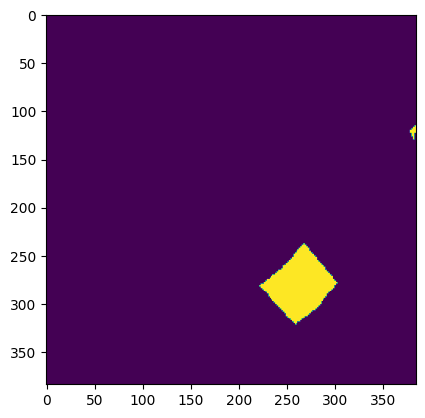

In [ ]:
%matplotlib inline
#
plt.imshow(Y_train[28], interpolation='none')
plt.show()

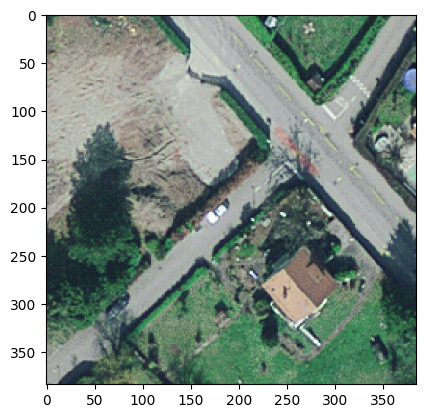

In [ ]:
X_train[2].shape
plt.imshow(X_train[28], interpolation='none')
plt.show()

# Define the U-net model

In [ ]:
input_size = (IMG_HEIGHT,IMG_WIDTH,3)

In [ ]:
def data_augmentation_layer():
  """Creates a data augmentation layer for flipping and rotating images."""
  flip_layer = RandomFlip("horizontal_and_vertical")
  rotation_range = 15  # Adjust rotation range as needed (in degrees)
  rotation_layer = RandomRotation(rotation_range/180.0)
  return keras.Sequential([flip_layer, rotation_layer])

In [ ]:
def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

In [ ]:
def encoder_block(inputs, num_filters):
    x = conv_block(inputs, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

In [ ]:
def decoder_block(inputs, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, 2, strides=2, padding="same")(inputs)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

In [ ]:
def build_unet(input_shape):
    inputs = Input(input_shape)
    x = data_augmentation_layer()(inputs)

    s1, p1 = encoder_block(x, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    # print(s1.shape, s2.shape, s3.shape, s4.shape)
    # print(p1.shape, p2.shape, p3.shape, p4.shape)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="UNET")
    return model

In [ ]:
model_1 = build_unet(input_size)

In [ ]:
model_1.compile(optimizer = Adam(learning_rate=1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
model_1.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 384, 384, 3)]        0         []                            
                                                                                                  
 sequential (Sequential)     (None, 384, 384, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 384, 384, 64)         1792      ['sequential[0][0]']          
                                                                                                  
 batch_normalization (Batch  (None, 384, 384, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                

In [ ]:
with tf.device('/GPU:0'):
  earlystopper = EarlyStopping(patience=3, verbose=1)
  checkpointer = ModelCheckpoint('/content/drive/MyDrive/AML_Project/Models/model1_c1_cp.h5', verbose=1, save_best_only=True)
  reduceLROnPlateau = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, min_lr=1e-7, verbose=1)
  history1 = model_1.fit(X_train, Y_train, validation_split=0.1, batch_size=2, epochs=10,
                      callbacks=[earlystopper, checkpointer, reduceLROnPlateau])

Epoch 1/10
110/110 [==============================] - ETA: 0s - loss: 0.3302 - accuracy: 0.8906
Epoch 1: val_loss improved from inf to 0.44274, saving model to /content/drive/MyDrive/AML_Project/Models/model1_c1_cp.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


110/110 [==============================] - 47s 431ms/step - loss: 0.3302 - accuracy: 0.8906 - val_loss: 0.4427 - val_accuracy: 0.8211 - lr: 1.0000e-07
Epoch 2/10
110/110 [==============================] - ETA: 0s - loss: 0.3315 - accuracy: 0.8906
Epoch 2: val_loss improved from 0.44274 to 0.44271, saving model to /content/drive/MyDrive/AML_Project/Models/model1_c1_cp.h5
110/110 [==============================] - 46s 421ms/step - loss: 0.3315 - accuracy: 0.8906 - val_loss: 0.4427 - val_accuracy: 0.8211 - lr: 1.0000e-07
Epoch 3/10
110/110 [==============================] - ETA: 0s - loss: 0.3303 - accuracy: 0.8906
Epoch 3: val_loss improved from 0.44271 to 0.44248, saving model to /content/drive/MyDrive/AML_Project/Models/model1_c1_cp.h5
110/110 [==============================] - 47s 428ms/step - loss: 0.3303 - accuracy: 0.8906 - val_loss: 0.4425 - val_accuracy: 0.8211 - lr: 1.0000e-07
Epoch 4/10
110/110 [==============================] - ETA: 0s - loss: 0.3305 - accuracy: 0.8906
Epoch 4

In [ ]:
history_dict = history1.history
# plt.style.use('seaborn-darkgrid')

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
print(accuracy, val_accuracy)
epochs = range(1, len(accuracy) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

[0.8905649185180664, 0.8905646800994873, 0.8905653953552246, 0.8905653357505798, 0.8905656933784485, 0.8905655145645142] [0.8210617303848267, 0.8210628032684326, 0.8210628032684326, 0.8210628032684326, 0.8210625648498535, 0.8210628032684326]


In [ ]:
model_1.save('/content/drive/MyDrive/AML_Project/Models/model1_c1.h5')

# Build Attention Unet

In [ ]:
import tensorflow as tf

def conv_block(x, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

In [ ]:
def encoder_block(x, num_filters):
    x = conv_block(x, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

In [ ]:
def attention_gate(g, s, num_filters):
    Wg = Conv2D(num_filters, 1, padding="same")(g)
    Wg = BatchNormalization()(Wg)

    Ws = Conv2D(num_filters, 1, padding="same")(s)
    Ws = BatchNormalization()(Ws)

    out = Activation("relu")(Wg + Ws)
    out = Conv2D(num_filters, 1, padding="same")(out)
    out = Activation("sigmoid")(out)

    return out * s

In [ ]:
def decoder_block(x, s, num_filters):
    x = UpSampling2D(interpolation="bilinear")(x)
    s = attention_gate(x, s, num_filters)
    x = Concatenate()([x, s])
    x = conv_block(x, num_filters)
    return x

In [ ]:
def attention_unet(input_shape):
    """ Inputs """
    inputs = Input(input_shape)

    """ Encoder """
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)

    b1 = conv_block(p3, 512)

    """ Decoder """
    d1 = decoder_block(b1, s3, 256)
    d2 = decoder_block(d1, s2, 128)
    d3 = decoder_block(d2, s1, 64)

    """ Outputs """
    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d3)

    """ Model """
    model = Model(inputs, outputs, name="Attention-UNET")
    return model

In [ ]:
model_2 = attention_unet(input_size)

In [ ]:
model_2.compile(optimizer = Adam(learning_rate=1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
model_2.summary()

Model: "Attention-UNET"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 384, 384, 3)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 384, 384, 64)         1792      ['input_3[0][0]']             
                                                                                                  
 batch_normalization_18 (Ba  (None, 384, 384, 64)         256       ['conv2d_19[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_18 (Activation)  (None, 384, 384, 64)         0         ['batch_normaliza

In [ ]:
with tf.device('/GPU:0'):
  earlystopper = EarlyStopping(patience=3, verbose=1)
  checkpointer = ModelCheckpoint('/content/drive/MyDrive/AML_Project/Models/model2_c1_cp.h5', verbose=1, save_best_only=True)
  reduceLROnPlateau = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, min_lr=1e-7, verbose=1)
  history2 = model_2.fit(X_train, Y_train, validation_split=0.1, batch_size=1, epochs=10,
                      callbacks=[earlystopper, checkpointer, reduceLROnPlateau])

Epoch 1/10
219/219 [==============================] - ETA: 0s - loss: 0.1193 - accuracy: 0.9506
Epoch 1: val_loss improved from inf to 0.27025, saving model to /content/drive/MyDrive/AML_Project/Models/model2_c1_cp.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


219/219 [==============================] - 43s 195ms/step - loss: 0.1193 - accuracy: 0.9506 - val_loss: 0.2702 - val_accuracy: 0.8750 - lr: 1.0000e-07
Epoch 2/10
219/219 [==============================] - ETA: 0s - loss: 0.1192 - accuracy: 0.9507
Epoch 2: val_loss did not improve from 0.27025
219/219 [==============================] - 38s 175ms/step - loss: 0.1192 - accuracy: 0.9507 - val_loss: 0.2729 - val_accuracy: 0.8734 - lr: 1.0000e-07
Epoch 3/10
219/219 [==============================] - ETA: 0s - loss: 0.1192 - accuracy: 0.9507
Epoch 3: val_loss did not improve from 0.27025
219/219 [==============================] - 38s 173ms/step - loss: 0.1192 - accuracy: 0.9507 - val_loss: 0.2755 - val_accuracy: 0.8723 - lr: 1.0000e-07
Epoch 4/10
219/219 [==============================] - ETA: 0s - loss: 0.1191 - accuracy: 0.9507
Epoch 4: val_loss did not improve from 0.27025
219/219 [==============================] - 38s 172ms/step - loss: 0.1191 - accuracy: 0.9507 - val_loss: 0.2715 - val_a

In [ ]:
model_2.save('/content/drive/MyDrive/AML_Project/Models/model2_c1.h5')

# **Test Models**

In [ ]:
# load the Aug model
from tensorflow import keras
model = keras.models.load_model('modelU_2_att.h5')

In [ ]:
cat = img.imread('/content/content/Dataset_2/test/images/DOP25_LV03_1301_11_2015_1_15_497500.0_119750.0.png')
resized_cat = resize(cat,(384,384,3))
plt.imshow(resized_cat, cmap='gray')
plt.show()

In [ ]:
pred = model.predict(np.expand_dims(resized_cat, 0))
image = pred.reshape(384,384)
image.min()

1/1 [==============================] - 1s 534ms/step


6.435397e-06

In [ ]:
image.shape

(384, 384)

In [ ]:
plt.imshow(image, cmap='gray')

In [ ]:
test_path = glob.glob('/content/content/Dataset_2/test/images/*')
gt_path = glob.glob('/content/content/Dataset_2/test/gt/*')

In [ ]:
from skimage.color import rgb2gray

iou=[]
for count,fn in enumerate(test_path):
    cat = img.imread(fn)
    cat = resize(cat,(384,384,3))
    pred = model.predict(np.expand_dims(cat, 0))
    pred = pred.reshape(384,384)*255
    ret, pred = cv2.threshold(pred, 120, 255, cv2.THRESH_BINARY)

    gt = img.imread(gt_path[count])
    gt = resize(gt,(384,384,3))
    gt = rgb2gray(gt)

    intersection = np.logical_and(gt, pred)
    union = np.logical_or(gt, pred)
    iou_score = np.sum(intersection) / np.sum(union)
    iou.append(iou_score)



1/1 [==============================] - 0s 21ms/step


In [ ]:
sum(iou) / len(iou)

0.04433527705323406

In [ ]:
cat = img.imread('/content/content/Dataset_2/test/images/DOP25_LV03_1301_11_2015_1_15_497500.0_119750.0.png')
cat = resize(cat,(384,384,3))
plt.imshow(cat, cmap='gray')
plt.show()

In [ ]:
pred = model.predict(np.expand_dims(cat, 0))
pred = pred.reshape(384,384)*255
ret, pred = cv2.threshold(pred, 120, 255, cv2.THRESH_BINARY)
plt.imshow(pred, cmap='gray')

1/1 [==============================] - 0s 23ms/step


In [ ]:
from skimage.color import rgb2gray
gt = img.imread('/content/content/Dataset_2/test/images/DOP25_LV03_1301_11_2015_1_15_497500.0_119750.0.png')
gt = resize(gt,(384,384,3))

gt = rgb2gray(gt)
plt.imshow(gt, cmap='gray')
plt.show()

In [ ]:
import numpy as np

In [ ]:
intersection = np.logical_and(gt, pred)
union = np.logical_or(gt, pred)
iou_score = np.sum(intersection) / np.sum(union)

In [ ]:
iou_score

0.014383951822916666